# –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–π –∫–æ–¥

**–î–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞–¥–∞–Ω–∏—è —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å—Ä–µ–¥—É —Å –∞–ø–ø–∞—Ä–∞—Ç–Ω—ã–º —É—Å–∫–æ—Ä–∏—Ç–µ–ª–µ–º GPU:**

In [26]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


–ë–ª–æ–∫ –∫–æ–¥–∞ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–æ—Ü–µ—Å—Å–∞ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import clear_output


class ProgressPlotter:
    def __init__(self) -> None:
        self._history_dict = defaultdict(list)

    def add_scalar(self, tag: str, value) -> None:
        self._history_dict[tag].append(value)

    def display_keys(self, ax, tags):
        if isinstance(tags, str):
            tags = [tags]
        history_len = 0
        ax.grid()
        for key in tags:
            ax.plot(self._history_dict[key], marker="X", label=key)
            history_len = max(history_len, len(self.history_dict[key]))
        if len(tags) > 1:
            ax.legend(loc="lower left")
        else:
            ax.set_ylabel(key)
        ax.set_xlabel("epoch")
        ax.set_xticks(np.arange(history_len))
        ax.set_xticklabels(np.arange(history_len))

    def display(self, groups=None):
        # groups list ofkeys like [['loss_train','loss_val'],['accuracy']]
        clear_output()
        n_groups = len(groups)
        fig, ax = plt.subplots(n_groups, 1, figsize=(12, 3 * n_groups))
        if n_groups == 1:
            ax = [ax]
        for i, keys in enumerate(groups):
            self.display_keys(ax[i], keys)
        fig.tight_layout()
        plt.show()

    @property
    def history_dict(self):
        return dict(self._history_dict)

–ß—Ç–æ–±—ã —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–ª–∏—Å—å, –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º —Å–ª—É—á–∞–π–Ω—ã–µ —Å–æ—Å—Ç–æ—è–Ω–∏—è:

In [20]:
import random


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)


set_random_seed(42)

# –ó–∞–¥–∞–Ω–∏–µ 1. –°–æ–∑–¥–∞–Ω–∏–µ –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω–æ–π —Å–µ—Ç–∏

1. –°–æ–∑–¥–∞–π—Ç–µ –¥–≤—É—Ö-—Ç—Ä–µ—Ö—Å–ª–æ–π–Ω—É—é* –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å —Å—Ä–µ–¥—Å—Ç–≤–∞–º–∏ PyTorch.
2. –î–æ–ø–æ–ª–Ω–∏—Ç–µ –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–π –∫–æ–¥ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.
3. –û–±—É—á–∏—Ç–µ –Ω–µ–π—Ä–æ—Å–µ—Ç—å –Ω–∞ CIFAR-10.
4. –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ loss –∏ accuracy –æ—Ç —ç–ø–æ—Ö–∏ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è.

–î–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã—Ö —Å–ª–æ–µ–≤ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∫–ª–∞—Å—Å [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear).

*–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–∫—Ä—ã—Ç—ã–π —Å–ª–æ–π —Å–æ 128 –Ω–µ–π—Ä–æ–Ω–∞–º–∏.

–£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏ –∏–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫:

In [4]:
!pip install -q torchmetrics

In [5]:
import torchvision
import torchmetrics
from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞—Ç–∞—Å–µ—Ç —Å –ø–æ–º–æ—â—å—é —Å—Ä–µ–¥—Å—Ç–≤ PyTorch.

In [6]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_val_data = CIFAR10(root="./CIFAR10", train=True, download=True, transform=transform)
test_data = CIFAR10(root="./CIFAR10", train=False, download=True, transform=transform)

train_data, val_data = random_split(train_val_data, lengths=[40000, 10000])

Files already downloaded and verified
Files already downloaded and verified


–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ CIFAR-10 —Å–æ–¥–µ—Ä–∂–∏—Ç 50&nbsp;000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ü—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–∏ [`random_split`](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split) –∏–∑ –º–æ–¥—É–ª—è `torch.utils.data` –º—ã –≤–∑—è–ª–∏ 40&nbsp;000 –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ 10&nbsp;000 –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏.

–¢–∞–∫–∂–µ –æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ —Å—É–º–º–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –ø–∞—Ä–∞–º–µ—Ç—Ä–µ `lengths` —Ñ—É–Ω–∫—Ü–∏–∏ `random_split` –¥–æ–ª–∂–Ω–∞ –≤ —Ç–æ—á–Ω–æ—Å—Ç–∏ —Ä–∞–≤–Ω—è—Ç—å—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ, –∫–æ—Ç–æ—Ä—ã–π –æ–Ω–∞ —Ä–∞–∑–¥–µ–ª—è–µ—Ç.

–û–±—ä–µ–∫—Ç—ã `train_data`, `val_data` —è–≤–ª—è—é—Ç—Å—è –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏ —Ä–∞–∑–±–∏–µ–Ω–∏—è –æ–±—ä–µ–∫—Ç–∞ `train_val_data`. –£–∫–∞–∑–∞—Ç–µ–ª—å –Ω–∞ —ç—Ç–æ—Ç –æ–±—ä–µ–∫—Ç —Ö—Ä–∞–Ω–∏—Ç—Å—è –≤ –∞—Ç—Ä–∏–±—É—Ç–µ `.dataset` —ç—Ç–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤:

In [7]:
(train_data.dataset is train_val_data) and (train_data.dataset is val_data.dataset)

True

–û–ø–∏—à–∏—Ç–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Å–µ—Ç–∏: –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–µ —Å–ª–æ–∏ + [—Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏](https://pytorch.org/docs/stable/nn.html?highlight=activation#non-linear-activations-weighted-sum-nonlinearity) –Ω–∞ –≤–∞—à –≤—ã–±–æ—Ä.

In [8]:
class FCNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 140)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(140, 10)
        self.tanh = nn.Tanh()
        self.logit = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.tanh(x)
        # x = self.fc3(x)
        logits = self.logit(x)
        return logits

**–ë–ª–æ–∫ –æ–±—É—á–µ–Ω–∏—è.**

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Ç–æ, —á—Ç–æ –≤ PyTorch –º–æ–¥–µ–ª—è—Ö –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–µ—Ç–æ–¥ `fit`, –∫–∞–∫ –≤ Sklearn. –ö–æ–¥, –æ—Ç–≤–µ—á–∞—é—â–∏–π –∑–∞ –æ–±—É—á–µ–Ω–∏–µ, –ø–∏—à–µ—Ç—Å—è –æ—Ç–¥–µ–ª—å–Ω–æ.

–û–ø—Ä–µ–¥–µ–ª–∏–º `batch_size` –∏ —Å–æ–∑–¥–∞–¥–∏–º –¥–≤–∞ DataLoader-–∞ –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–æ–∫:

In [9]:
batch_size = 256

train_loader = DataLoader(
    train_data, batch_size=batch_size, shuffle=True, num_workers=2
)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)

–§—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –≤–æ–∑—å–º–µ–º –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ [`torchmetrics`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html):

In [10]:
score_function = torchmetrics.Accuracy(task="multiclass", num_classes=10)

**–¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.**

–û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ `train_loop` –∏ `val_loop`. –î–æ–ø–∏—à–∏—Ç–µ –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–π –∫–æ–¥. –ü–æ–ª—å–∑—É–π—Ç–µ—Å—å –º–∞—Ç–µ—Ä–∏–∞–ª–æ–º –ª–µ–∫—Ü–∏–∏.


In [22]:
def train_loop(dataloader, model, criterion, optimizer, score_function, device):
    num_batches = len(dataloader)

    train_loss = 0

    for imgs, labels in dataloader:
        
        pred = model(imgs.to(device))
        loss = criterion(pred, labels.to(device))

        # Optimization
        # Nullify gradients, do a backward and do an optimization step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # End of your code

        train_loss += loss.detach().item()

        # accumulating predictions and true labels to calculate score function
        score_function.update(pred.cpu(), labels)

    train_loss /= num_batches

    train_score = score_function.compute().item()
    score_function.reset()

    return train_loss, train_score

In [23]:
def val_loop(dataloader, model, criterion, score_function, device):
    num_batches = len(dataloader)

    val_loss = 0

    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred =  model(imgs.to(device))
            loss =  criterion(pred, labels.to(device))

            val_loss += loss.item()

            # accumulating predictions and true labels to calculate score function
            score_function.update(pred.cpu(), labels)

    val_loss /= num_batches

    val_score = score_function.compute().item()
    score_function.reset()

    return val_loss, val_score

–î–æ–ø–æ–ª–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é `train` –≤—ã–∑–æ–≤–æ–º `train_loop` –∏ `val_loop` –≤–Ω—É—Ç—Ä–∏ —Ü–∏–∫–ª–∞ –ø–æ —ç–ø–æ—Ö–∞–º:

In [24]:
def train(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    score_function,
    device,
    num_epochs=10,
):

    pp = ProgressPlotter()
    for i in range(num_epochs):

        # properly call train_loop and val_loop
        train_loss, train_score = train_loop(train_loader, model, criterion, optimizer, score_function, device)


        val_loss, val_score = val_loop(val_loader, model, criterion, score_function, device)

        # logging
        pp.add_scalar("loss_train", train_loss)
        pp.add_scalar("score_train", train_score)

        pp.add_scalar("loss_val", val_loss)
        pp.add_scalar("score_val", val_score)

        pp.display([["loss_train", "loss_val"], ["score_train", "score_val"]])
    return pp

–°–æ–∑–¥–∞–Ω–∏–µ —ç–∫–∑–µ–º–ø–ª—è—Ä–∞ –º–æ–¥–µ–ª–∏, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞, —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, –∏ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ –∑–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è.

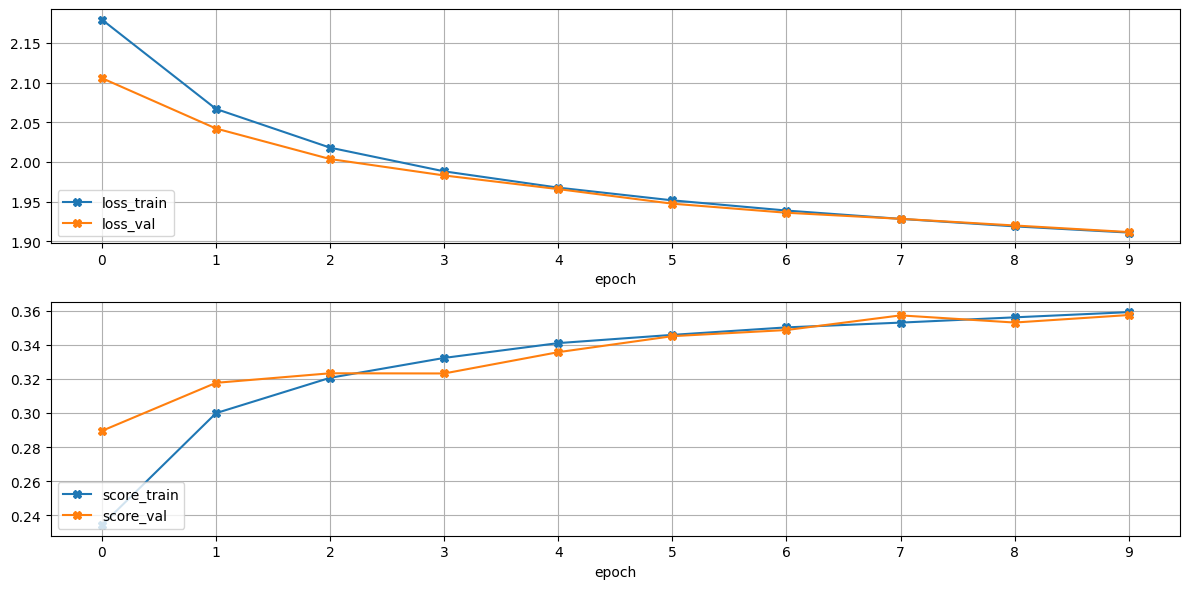

In [14]:
model = FCNet().to(device)  # Create model instance and move it to device

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Weights update algorithm
criterion = nn.CrossEntropyLoss()  # Loss function

pp = train(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    score_function,
    device,
    num_epochs=10,
)

–§—É–Ω–∫—Ü–∏—è `train` –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç `ProgressPlotter`, –∫–æ—Ç–æ—Ä—ã–π –∏–º–µ–µ—Ç –∞—Ç—Ä–∏–±—É—Ç `.history_dict` ‚Äî —Å–ª–æ–≤–∞—Ä—å, –≤ –∫–æ—Ç–æ—Ä–æ–º —Ö—Ä–∞–Ω–∏—Ç—Å—è –∏—Å—Ç–æ—Ä–∏—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏: –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –æ–±—É—á–∞—é—â–∏—Ö –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ —ç–ø–æ—Ö–∞–º.

–ü–æ –∫–ª—é—á—É `score_val` –º–æ–∂–Ω–æ –∏–∑–≤–ª–µ—á—å –∏–∑ —Å–ª–æ–≤–∞—Ä—è –∑–Ω–∞—á–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ —ç–ø–æ—Ö–∞–º –∏ –≤—ã–≤–µ—Å—Ç–∏ –∏—Ç–æ–≥–æ–≤—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏, –¥–æ—Å—Ç–∏–≥–Ω—É—Ç—É—é –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π —ç–ø–æ—Ö–µ (–æ–±—Ä–∞—Ç–∏–º—Å—è –∫ –ø–æ—Å–ª–µ–¥–Ω–µ–º—É —ç–ª–µ–º–µ–Ω—Ç—É –≤ —Å–ø–∏—Å–∫–µ –ø–æ –∏–Ω–¥–µ–∫—Å—É `-1`).

In [15]:
accuracy = pp.history_dict["score_val"][-1]
print(f"Accuracy {accuracy:.2f}")

Accuracy 0.36


## –§–æ—Ä–º–∞—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

–ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è —Å–µ—Ç–∏.

–ü—Ä–∏–º–µ—Ä –≥—Ä–∞—Ñ–∏–∫–∞:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/Exercises/EX05/result_1_task_ex05.png" width="800">

# –ó–∞–¥–∞–Ω–∏–µ 2. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏ –æ–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å –Ω–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

* –ü–æ–¥—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ 3-—Ö —Ü–≤–µ—Ç–æ–≤—ã—Ö –∫–∞–Ω–∞–ª–æ–≤ —Å –ø–æ–º–æ—â—å—é –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –≤ PyTorch –∏–ª–∏ NumPy —Ñ—É–Ω–∫—Ü–∏–π.
* –ù–æ—Ä–º–∞–ª–∏–∑—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —ç—Ç–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—é `Normalize`[üõ†Ô∏è[doc]](https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html)).
* –û—Ü–µ–Ω–∏—Ç–µ –≤–ª–∏—è–Ω–∏–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è (—Å—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è –Ω–∞ —Å—ã—Ä—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –∑–∞–¥–∞–Ω–∏–∏ ‚Ññ1 –∏ –Ω–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö).

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —Ç–µ–Ω–∑–æ—Ä–∞ —Å –æ–±—É—á–∞—é—â–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏:

In [16]:
raw_train_data = train_data.dataset.data[train_data.indices]

print(type(raw_train_data))
print(raw_train_data.shape)

<class 'numpy.ndarray'>
(40000, 32, 32, 3)


–í—ã—á–∏—Å–ª–∏—Ç–µ —Å—Ä–µ–¥–Ω–∏–µ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è **–ø–æ –∫–∞–∂–¥–æ–º—É –∏–∑ —Ç—Ä–µ—Ö —Ü–≤–µ—Ç–æ–≤—ã—Ö –∫–∞–Ω–∞–ª–æ–≤** –¥–ª—è –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

–ö–∞–∂–¥—ã–π –∫–∞–Ω–∞–ª –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑—É–µ—Ç—Å—è –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ. –ü–æ—ç—Ç–æ–º—É –∫–∞–∂–¥—ã–π –∏–∑ –æ–±—ä–µ–∫—Ç–æ–≤ `cifar10_mean` –∏ `cifar10_std` –¥–æ–ª–∂–µ–Ω –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—Ç—å –∏–∑ —Å–µ–±—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å (`list` / `np.ndarray` / `torch.Tensor`) –¥–ª–∏–Ω–æ–π –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–Ω–∞–ª–æ–≤.

–¢–∞–∫–∂–µ –Ω–µ –∑–∞–±—É–¥—å—Ç–µ, —á—Ç–æ `Normalize` –±—É–¥–µ—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å—Å—è –ø–æ—Å–ª–µ `ToTensor`, –∏ –ø–æ—ç—Ç–æ–º—É —Å—Ä–µ–¥–Ω–∏–µ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω—ã –≤ $[0,1]$.

In [17]:
cifar10_mean = raw_train_data.mean(axis=(0,1,2)) / raw_train_data.max()
cifar10_std = raw_train_data.std(axis=(0,1,2)) / raw_train_data.max()
print(f"Mean: {cifar10_mean}, Std: {cifar10_std}")

Mean: [0.49171654 0.48256152 0.44711783], Std: [0.24705465 0.24350537 0.26166664]


–°–æ–∑–¥–∞–π—Ç–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é, –∏ –ø–æ–¥–º–µ–Ω–∏—Ç–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ –æ–±—É—á–∞—é—â–µ–º Dataset-–µ –Ω–∞ –Ω–æ–≤—É—é.

**–í–Ω–∏–º–∞–Ω–∏–µ! –ù–µ–æ—á–µ–≤–∏–¥–Ω–∞—è –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å!**

–ê—Ç—Ä–∏–±—É—Ç `.transform` –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–µ—Ä–µ–æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –Ω–µ —É –æ–±—ä–µ–∫—Ç–æ–≤ `train_data` –∏ `val_data`, –∞ —É –æ–±—ä–µ–∫—Ç–∞ `train_data.dataset`, –∏–∑ –∫–æ—Ç–æ—Ä–æ–≥–æ `train_data` –∏ `val_data` –±—ã–ª–∏ —Å–ª—É—á–∞–π–Ω–æ –æ—Ç–æ–±—Ä–∞–Ω—ã —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ `random_split` –≤ –∑–∞–¥–∞–Ω–∏–∏ ‚Ññ1.

–§—É–Ω–∫—Ü–∏—è `random_split` –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç—ã –∫–ª–∞—Å—Å–∞ `Subset`, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –∏–º–µ—é—Ç —Å–≤–æ–∏—Ö —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–π, –∞ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ –≤ —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–º –æ–±—ä–µ–∫—Ç–µ –∫–ª–∞—Å—Å–∞ `Dataset`.

In [18]:
from torchvision import transforms

transform_with_normalize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cifar10_mean, cifar10_std)
])

print("Old train transform:", train_val_data.transform)
print("Old test transform:", test_data.transform)

train_data.dataset.transform = transform_with_normalize

print("\nNew train transform:", train_val_data.transform)
print("New test transform:", test_data.transform)

Old train transform: Compose(
    ToTensor()
)
Old test transform: Compose(
    ToTensor()
)

New train transform: Compose(
    ToTensor()
    Normalize(mean=[0.49171654 0.48256152 0.44711783], std=[0.24705465 0.24350537 0.26166664])
)
New test transform: Compose(
    ToTensor()
)


–°–Ω–æ–≤–∞ —Å–æ–∑–¥–∞–π—Ç–µ —ç–∫–∑–µ–º–ø–ª—è—Ä –º–æ–¥–µ–ª–∏, –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä –∏ —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å, –∏ –≤—ã–∑–æ–≤–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (–º–æ–∂–Ω–æ —Å–∫–æ–ø–∏—Ä–æ–≤–∞—Ç—å –∫–æ–¥ –∏–∑ –∑–∞–¥–∞–Ω–∏—è ‚Ññ1).

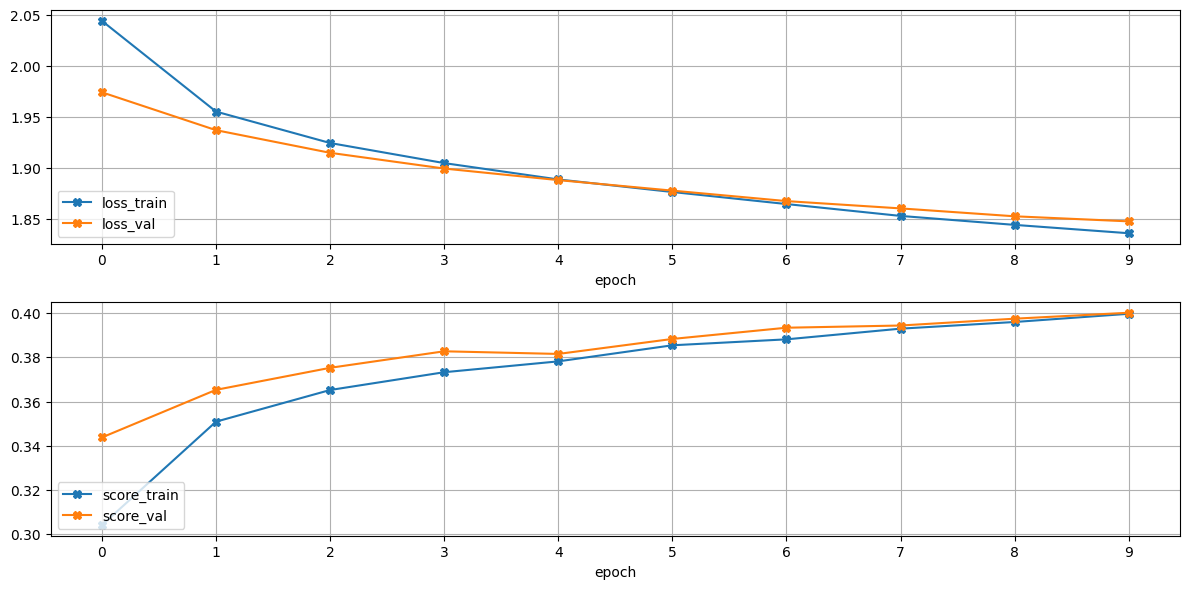

In [19]:
model = FCNet().to(device)  # Create model instance and move it to device

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Weights update algorithm
criterion = nn.CrossEntropyLoss()  # Loss function

pp = train(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    score_function,
    device,
    num_epochs=10,
)

–í—ã–≤–µ–¥–∏—Ç–µ –∏—Ç–æ–≥–æ–≤—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

In [20]:
accuracy = pp.history_dict["score_val"][-1]
print(f"Accuracy {accuracy:.2f}")

Accuracy 0.40


–î–ª—è —Å–ª–µ–¥—É—é—â–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–∏–º –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—É—é —Ç–æ—á–∫—É: –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å, —Å–æ—Å—Ç–æ—è–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –∏ –ø—Ä–æ–≥—Ä–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è.

In [21]:
torch.save(
    {
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "progress_plotter": pp,
    },
    f="checkpoint_task2.pth",
)

## –§–æ—Ä–º–∞—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

–ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è —Å–µ—Ç–∏.

–ü—Ä–∏–º–µ—Ä –≥—Ä–∞—Ñ–∏–∫–∞:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/Exercises/EX05/result_2_task_ex05.png" width="800">

# –ó–∞–¥–∞–Ω–∏–µ 3. –ü—Ä–æ–¥–æ–ª–∂–µ–Ω–∏–µ –æ–±—É—á–µ–Ω–∏—è –∏–∑ –∫–æ–Ω—Ç–æ–ª—å–Ω–æ–π —Ç–æ—á–∫–∏

–ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è –≤–∏–¥–Ω–æ, —á—Ç–æ –µ—Å–ª–∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –æ–±—É—á–∞—Ç—å –º–æ–¥–µ–ª—å –µ—â–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç–ø–æ—Ö, —Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–∂–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—å—Å—è.

–í —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ:
1. –ó–∞–≥—Ä—É–∑–∏—Ç—å –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—É—é —Ç–æ—á–∫—É, —Å–æ–¥–µ—Ä–∂–∞—â—É—é –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å, —Å–æ—Å—Ç–æ—è–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –∏ –ø—Ä–æ–≥—Ä–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è, –∏–∑ –∑–∞–¥–∞–Ω–∏—è ‚Ññ2.
2. –ü—Ä–æ–¥–æ–ª–∂–∏—Ç—å –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ –µ—â–µ 25 —ç–ø–æ—Ö.
3. –í—ã–≤–µ—Å—Ç–∏ —Å—É–º–º–∞—Ä–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏ –æ–±—É—á–µ–Ω–∏—è, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø—Ä–µ–¥—ã–¥—É—à–µ–º –ø—Ä–æ–≥—Ä–µ—Å—Å–µ –∏ –æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –¥–æ–æ–±—É—á–µ–Ω–∏—è.
4. –û—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –≤ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∑–∞–¥–∞–Ω–∏—è—Ö –º—ã –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ).



–ó–∞–≥—Ä—É–∑–∏–º –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—É—é —Ç–æ—á–∫—É, –∫–æ—Ç–æ—Ä—É—é –º—ã —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏ –≤ –∑–∞–¥–∞–Ω–∏–∏ ‚Ññ2, –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –≤ –Ω–µ–π —Ö—Ä–∞–Ω–∏—Ç—Å—è:

In [22]:
checkpoint = torch.load("checkpoint_task2.pth")

print(f"Type of checkpoint: {type(checkpoint)}")
print(f"checkpoint keys: {checkpoint.keys()}")

Type of checkpoint: <class 'dict'>
checkpoint keys: dict_keys(['model_state_dict', 'optimizer_state_dict', 'progress_plotter'])


C:\Users\bleep\AppData\Local\Temp\ipykernel_18800\936520468.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("checkpoint_task2.pth")


–°–æ–∑–¥–∞–π—Ç–µ –Ω–æ–≤—É—é –º–æ–¥–µ–ª—å –∫–ª–∞—Å—Å–∞ `FCNet` –∏ –Ω–æ–≤—ã–π –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä `torch.optim.SGD`.
–ó–∞–≥—Ä—É–∑–∏—Ç–µ –∏–∑ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π —Ç–æ—á–∫–∏ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –≤ —Å–æ–∑–¥–∞–Ω–Ω—ã–µ –æ–±—ä–µ–∫—Ç—ã —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ `load_state_dict`.

In [23]:
model = FCNet().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Your code here
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –µ—â–µ –≤ —Ç–µ—á–µ–Ω–∏–µ 25 —ç–ø–æ—Ö. –¢–∞–∫ –∫–∞–∫ –º—ã –∑–∞–≥—Ä—É–∑–∏–ª–∏ –≤ –º–æ–¥–µ–ª—å —Å–æ—Å—Ç–æ—è–Ω–∏–µ, –≤ –∫–æ—Ç–æ—Ä–æ–º –æ–Ω–∞ —É–∂–µ –±—ã–ª–∞ —Å–∫–æ–ª—å–∫–æ-—Ç–æ –æ–±—É—á–µ–Ω–∞, —Ç–æ –≤—ã–∑–æ–≤ –∫–æ–¥–∞ –æ–±—É—á–µ–Ω–∏—è –ø—Ä–æ—Å—Ç–æ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç –æ–±—É—á–µ–Ω–∏–µ.

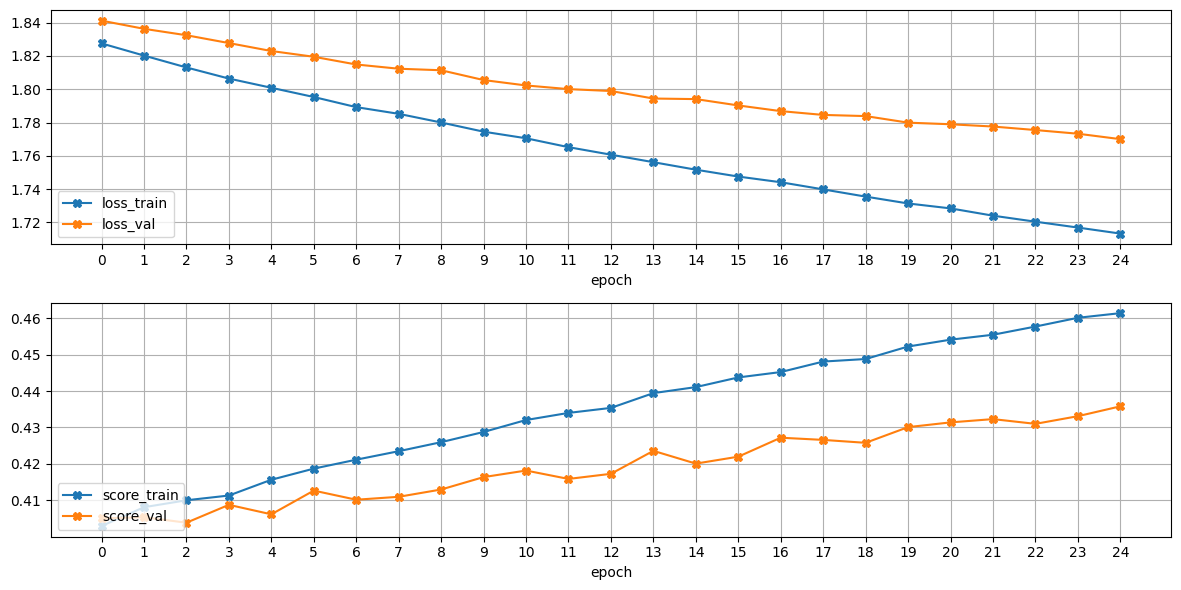

In [24]:
pp = train(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    score_function,
    device,
    num_epochs=25,
)

–í—ã–≤–µ–¥–∏—Ç–µ –∏—Ç–æ–≥–æ–≤—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

In [25]:
accuracy = pp.history_dict["score_val"][-1]
print(f"Accuracy {accuracy:.2f}")

Accuracy 0.44


–í—ã—à–µ –≤—ã–≤–µ–¥–µ–Ω—ã –≥—Ä–∞—Ñ–∏–∫–∏ —Ç–æ–ª—å–∫–æ –ø—Ä–æ—Ü–µ—Å—Å–∞ –¥–æ–æ–±—É—á–µ–Ω–∏—è.

–î–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è —Å—É–º–º–∞—Ä–Ω–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞ –ø—Ä–æ—Ü–µ—Å—Å–∞ –æ–±—É—á–µ–Ω–∏—è –∑–∞–≥—Ä—É–∑–∏—Ç–µ –∏–∑ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π —Ç–æ—á–∫–∏ `progress_plotter`:

In [26]:
pp_old = checkpoint['progress_plotter']

print(f"pp_old.history_dict keys: {pp_old.history_dict.keys()}")
print(f'Type of pp_old.history_dict["loss_train"]: {type(pp_old.history_dict["loss_train"])}')

pp_old.history_dict keys: dict_keys(['loss_train', 'score_train', 'loss_val', 'score_val'])
Type of pp_old.history_dict["loss_train"]: <class 'list'>


–ó–Ω–∞—á–µ–Ω–∏—è–º–∏ (values) –≤ —Å–ª–æ–≤–∞—Ä–µ `pp_old.history_dict` —è–≤–ª—è—é—Ç—Å—è —Å–ø–∏—Å–∫–∏.
–ü–æ –∫–∞–∂–¥–æ–º—É –∫–ª—é—á—É –≤ —Å–ª–æ–≤–∞—Ä–µ `pp_old.history_dict` –¥–æ–±–∞–≤—å—Ç–µ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Å–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏—è, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –¥–æ–æ–±—É—á–µ–Ω–∏—è.

In [27]:
for key in pp_old.history_dict.keys():
    pp_old.history_dict[key] += pp.history_dict[key]

–û—Ç–æ–±—Ä–∞–∑–∏–º –∏—Ç–æ–≥–æ–≤—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏:

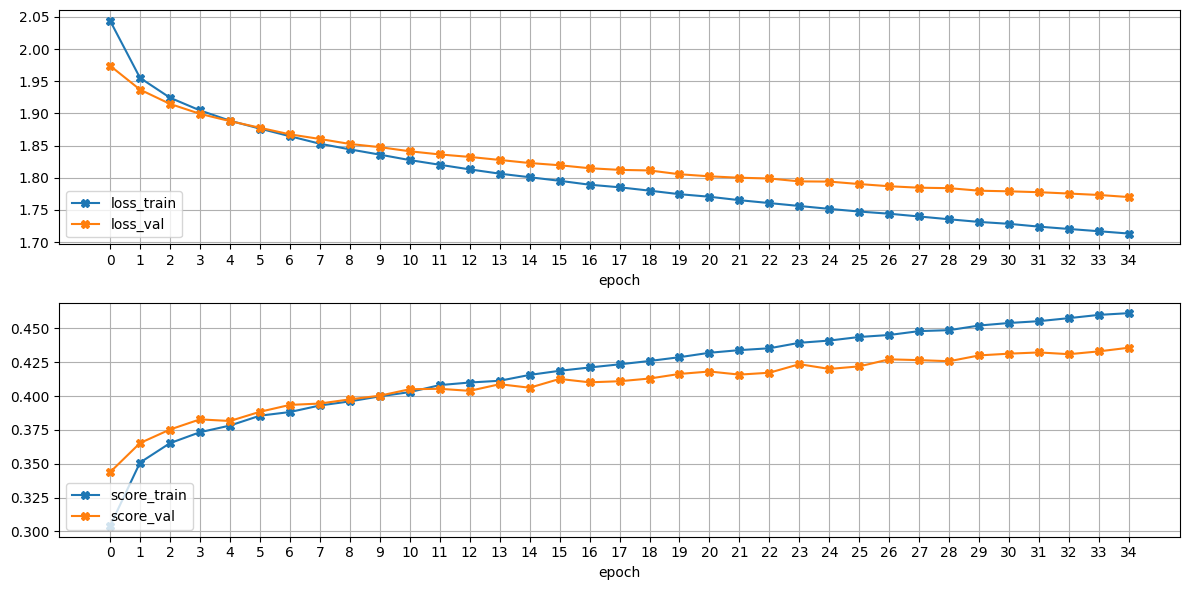

In [28]:
pp_old.display([["loss_train", "loss_val"], ["score_train", "score_val"]])

–û—Ü–µ–Ω–∏—Ç–µ —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ **—Ç–µ—Å—Ç–æ–≤–æ–º** –¥–∞—Ç–∞—Å–µ—Ç–µ (`testset`).

1. –î–æ–±–∞–≤—å—Ç–µ –≤ —Ç–µ—Å—Ç–æ–≤—ã–π Dataset —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—é, –≤–∫–ª—é—á–∞—é—â—É—é –≤ —Å–µ–±—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é.
2. C–æ–∑–¥–∞–π—Ç–µ DataLoader –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
3. –û—Ü–µ–Ω–∏—Ç–µ —Ç–æ—á–Ω–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ `val_loop`.



In [29]:
batch_size = 256

test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_data.transform = transform_with_normalize
test_loss, test_score = val_loop(test_loader, model, criterion, score_function, device)

In [30]:
test_loss, test_score

(1.7752021849155426, 0.43070000410079956)

## –§–æ—Ä–º–∞—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

1. –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö 0.48 .. 0.52
2. –°—É–º–º–∞—Ä–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è. –ü—Ä–∏–º–µ—Ä –≥—Ä–∞—Ñ–∏–∫–∞:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/Exercises/EX05/result_3_task_ex05.png" width="800">

# –ó–∞–¥–∞–Ω–∏–µ 4. –¢–µ—Ö–Ω–∏–∫–∏ –¥–ª—è —Ä–∞–±–æ—Ç—ã –≤ —É—Å–ª–æ–≤–∏—è—Ö –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤

–í —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ [Car Evaluation](https://archive.ics.uci.edu/dataset/19/car+evaluation).

–¢—Ä–µ–±—É–µ—Ç—Å—è –æ–±—É—á–∏—Ç—å –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å, —Å–¥–µ–ª–∞–≤ –±–µ–π–∑–ª–∞–π–Ω —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ—Ç–µ—Ä—å `CrossEntropyLoss`, –∞ –∑–∞—Ç–µ–º —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ç–µ—Ö–Ω–∏–∫–∏ –¥–ª—è —Ä–∞–±–æ—Ç—ã –≤ —É—Å–ª–æ–≤–∏—è—Ö –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞:

1. `CrossEntropyLoss` **—Å –≤–µ—Å–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤**,
2. `FocalLoss`,
3. `FocalLoss` **—Å –≤–µ—Å–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤**,
4. `WeightedRandomSamlper` –ø—Ä–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å `CrossEntropyLoss`,
5. `WeightedRandomSamlper` –ø—Ä–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å `FocalLoss`,

—Å—Ä–∞–≤–Ω–∏—Ç—å –∏—Ö –º–µ–∂–¥—É —Å–æ–±–æ–π –∏ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã.

–£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏ –∏–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫:

In [ ]:
!pip install -q torchmetrics

In [2]:
import torch
import torchmetrics
import pandas as pd

from torch import nn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from torch.utils.data import WeightedRandomSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## –û–±–∑–æ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–Ω–∏—è

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞—Ç–∞—Å–µ—Ç –∏ –≤–∑–≥–ª—è–Ω–µ–º –Ω–∞ –Ω–µ–≥–æ:

In [3]:
# !wget -qN https://archive.ics.uci.edu/static/public/19/car+evaluation.zip
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/car_evaluation.zip
!unzip -qo car_evaluation.zip

"unzip" ÔøΩÔøΩ Ô¢´ÔøΩÔøΩÔøΩÔøΩ ÔøΩÔøΩÔøΩÔøΩ‡•≠ÔøΩÔøΩÔøΩ ÔøΩÔøΩÔøΩ ÔøΩÔøΩÔøΩË≠•ÔøΩ
ÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩ, ÔøΩ·ØÆÔøΩÔøΩÔ•¨ÔøΩÔøΩ ÔøΩ‡Æ£‡†¨ÔøΩÔøΩÔøΩ ÔøΩÔøΩÔøΩ ÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩ ‰†©ÔøΩÔøΩÔøΩ.


In [5]:
data = pd.read_csv(
    "car.data",
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"],
)

data

buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]

–í –∞—Ä—Ö–∏–≤–µ –Ω–∞–π–¥–µ–º —Ç–µ–∫—Å—Ç–æ–≤—ã–π —Ñ–∞–π–ª —Å –æ–ø–∏—Å–∞–Ω–∏–µ–º –¥–∞—Ç–∞—Å–µ—Ç–∞ `car.names`. –í—ã–≤–µ–¥–µ–º –µ–≥–æ:

In [6]:
!cat car.names

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç 1728 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –æ–± –∞–≤—Ç–æ–º–æ–±–∏–ª—è—Ö, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è —à–µ—Å—Ç—å—é –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏:
1. `buying` ‚Äî —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø–æ–∫—É–ø–∫–∏
2. `maint` ‚Äî —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è
3. `doors` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–≤–µ—Ä–µ–π
4. `persons` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤
5. `lug_boot` ‚Äî —Ä–∞–∑–º–µ—Ä –±–∞–≥–∞–∂–Ω–∏–∫–∞
6. `safety` ‚Äî –æ—Ü–µ–Ω–∫–∞ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏ –º–∞—à–∏–Ω—ã.

–¢–∞–∫–∂–µ –∏–º–µ–µ—Ç—Å—è —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ `class` —Å —á–µ—Ç—ã—Ä—å–º—è —É–Ω–∏–∫–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏:

* `unacc` ‚Äî –Ω–µ–ø—Ä–∏–µ–º–ª–µ–º–æ
* `acc` ‚Äî –ø—Ä–∏–µ–º–ª–µ–º–æ
* `good` ‚Äî —Ö–æ—Ä–æ—à–æ
* `vgood` ‚Äî –æ—Ç–ª–∏—á–Ω–æ

–û—Ü–µ–Ω–∏–º –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤:

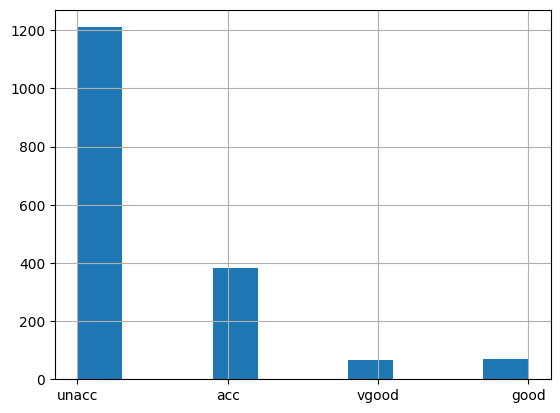

In [8]:
import matplotlib.pyplot as plt

data["class"].hist()
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:

In [9]:
data.describe()

buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210

–í—Å–µ –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ ‚Äî –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, –ø–æ—ç—Ç–æ–º—É –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –Ω—É–∂–Ω–æ –∏—Ö –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å. –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)-–æ–º –¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –≤—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [111]:
# split data to input x and target y
x, y = data.iloc[:, :-1], data.iloc[:, -1]

In [112]:
encoder = OneHotEncoder(sparse_output=False)

x_encoded = encoder.fit_transform(x)

x_encoded.shape

(1728, 21)

–ö–ª–∞—Å—Å—ã –ø—Ä–æ—Å—Ç–æ –∑–∞–∫–æ–¥–∏—Ä—É–µ–º –ø–æ—Ä—è–¥–∫–æ–≤—ã–º–∏ —á–∏—Å–ª–∞–º–∏:

In [113]:
classes = ["unacc", "acc", "good", "vgood"]
class_labels = [0, 1, 2, 3]
class_to_idx = dict(zip(classes, class_labels))
class_to_idx

{'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

In [114]:
y_encoded = y.map(class_to_idx)  # mapping class names into their indexes
y_encoded = y_encoded.values  # transform Pandas Series into numpy array
y_encoded

array([0, 0, 0, ..., 0, 2, 3], dtype=int64)

–†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â–∏–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 80/20 –∏ –ø–µ—Ä–µ–≤–µ–¥–µ–º –∏—Ö –≤ `torch.tensor`:

In [115]:
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

–°–æ–∑–¥–∞–¥–∏–º `Dataset`-—ã –∏ `DataLoader`-—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π.

–û–±—É—á–∞—é—â–∏–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –∏–∑ —Å–µ–±—è —É–∂–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ —Ç–µ–Ω–∑–æ—Ä—ã. –ü–æ—ç—Ç–æ–º—É –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è `Dataset`-–æ–≤ –º–æ–∂–Ω–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∫–ª–∞—Å—Å–æ–º [`TensorDataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset).

In [116]:
trainset = torch.utils.data.TensorDataset(x_train, y_train)

testset = torch.utils.data.TensorDataset(x_test, y_test)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

–ù–∞–ø–∏—à–∏—Ç–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω–æ–π —Å–µ—Ç–∏ –¥–ª—è —ç—Ç–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞. –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å 1‚Äì2 —Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ—è –∏–∑ 5‚Äì10 –Ω–µ–π—Ä–æ–Ω–æ–≤.

In [117]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(21, 10)
        self.tan1 = nn.Tanh()
        self.fc2 = nn.Linear(10, 5)
        self.tan2 = nn.Tanh()
        self.fc3 = nn.Linear(5, 4)


    def forward(self, x):
        x = self.fc1(x)
        x = self.tan1(x)
        x = self.fc2(x)
        x = self.tan2(x)
        out = self.fc3(x)
        return out

## –ü–æ–∫–∞–∑–∞—Ç–µ–ª—å –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–∏ –¥–∏—Å–±–∞–ª–∞–Ω—Å–µ

–¢–∞–∫ –∫–∞–∫ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω, –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –ø–æ accuracy –±—É–¥–µ—Ç –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ. –í –∫–∞—á–µ—Ç—Å–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ü–µ–Ω–∫–∏ –º–æ–∂–µ–º –≤—ã–±—Ä–∞—Ç—å F1-score. –ï–≥–æ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –≤–æ–∑—å–º–µ–º –∏–∑ [`torchmetrics`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f-1-score):

In [118]:
score_function = torchmetrics.F1Score(task="multiclass", num_classes=4, average="macro")

## –ë–µ–π–∑–ª–∞–π–Ω c –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏–µ–π

–î–∞–ª–µ–µ –±—É–¥–µ—Ç —Å–µ—Ä–∏—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –ø–æ –æ–±—É—á–µ–Ω–∏—é –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ –Ω–∞ —ç—Ç–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ç–µ—Ö–Ω–∏–∫ —Ä–∞–±–æ—Ç—ã –≤ —É—Å–ª–æ–≤–∏—è—Ö –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤.
–î–ª—è –Ω–∞—á–∞–ª–∞ –æ–±—É—á–∏—Ç–µ –±–µ–π–∑–ª–∞–π–Ω —Å `CrossEntropyLoss`.

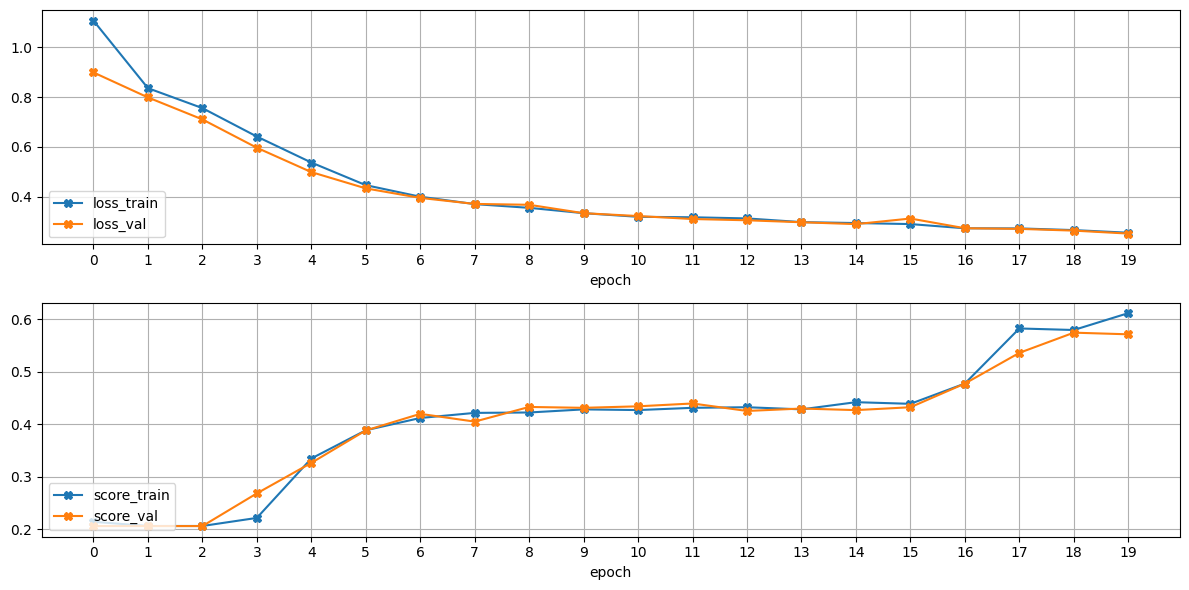

In [119]:
set_random_seed(42)

model = Network().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

pp = train(model, train_loader, test_loader, criterion, optimizer, score_function, device, num_epochs=20)

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø—Ä–æ–≥–æ–Ω–∞ DataLoader-a —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å –∏ –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.

In [120]:
def get_true_and_pred(dataloader, model):
    y_true, y_pred = [], []

    for input, target in dataloader:
        y_true.append(target)
        output = model(input.to(device))
        output = torch.argmax(output.cpu().detach(), dim=1)
        y_pred.append(output)

    y_true = np.array(torch.cat(y_true))
    y_pred = np.array(torch.cat(y_pred))

    return y_true, y_pred

–í—ã–≤–µ–¥–µ–º –æ—Ç—á–µ—Ç –æ –∫–∞—á–µ—Å—Ç–≤–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html):

In [123]:
y_test_true, y_test_pred = get_true_and_pred(test_loader, model)

print(
    classification_report(
        y_test_true, y_test_pred, target_names=classes, zero_division=0
    )
)

              precision    recall  f1-score   support

       unacc       0.98      0.97      0.97       242
         acc       0.72      0.92      0.81        77
        good       0.00      0.00      0.00        14
       vgood       0.71      0.38      0.50        13

    accuracy                           0.90       346
   macro avg       0.60      0.57      0.57       346
weighted avg       0.87      0.90      0.88       346



–¢–∞–∫–∂–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫ ([`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). –û—Ç–æ–±—Ä–∞–∑–∏–º –µ–µ —Å –ø–æ–º–æ—â—å—é [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

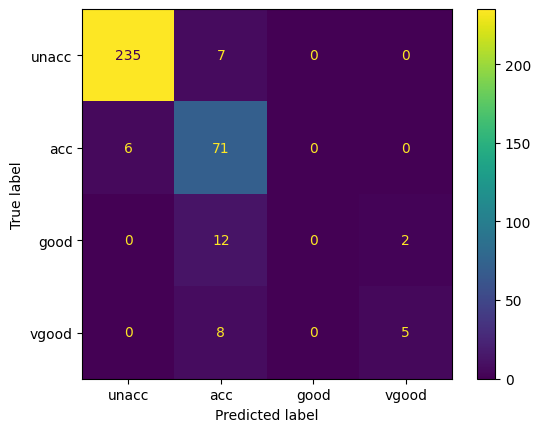

In [124]:
cm = confusion_matrix(y_test_true, y_test_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot()
plt.show()

–û–ø–∏—à–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ö–∞–∫–∏–µ –ø—Ä–æ–±–ª–µ–º—ã –≤—ã –Ω–∞–±–ª—é–¥–∞–µ—Ç–µ?

–í —Å–∏–ª—É –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤ (—Ç.–µ. —É –Ω–∞—Å –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç –∫–ª–∞—Å—Å—ã unacc –∏ acc) –Ω–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å —Ö–æ—Ä–æ—à–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç —ç—Ç–∏ –∫–ª–∞—Å—Å—ã, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –æ—á–µ–Ω—å –ø–ª–æ—Ö–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª–∞ –∫–ª–∞—Å—Å—ã vgood, –∏ –æ—Å–æ–±–µ–Ω–Ω–æ good (–≥–¥–µ —É –Ω–∞—Å TP = 0)

## –ö—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è —Å –≤–µ—Å–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤

–í–∞–º –Ω—É–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π —Ç–µ–Ω–∑–æ—Ä `weights_for_classes` —Å –≤–µ—Å–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤. –í –∫–∞—á–µ—Å—Ç–≤–µ –≤–µ—Å–æ–≤ –º–æ–∂–Ω–æ –≤–∑—è—Ç—å –≤–µ–ª–∏—á–∏–Ω—ã, –æ–±—Ä–∞—Ç–Ω—ã–µ –∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –æ–±—ä–µ–∫—Ç–æ–≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.

**–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ**, —Ç–µ–Ω–∑–æ—Ä —Å –≤–µ—Å–∞–º–∏ `weights_for_classes` –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω –Ω–∞ `device`.

In [45]:
# Your code here

weights_for_classes = torch.tensor(1 / data["class"].value_counts()).float().to(device)

weights_for_classes

tensor([0.0008, 0.0026, 0.0145, 0.0154])

–û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å —Å `CrossEntropyLoss`, –ø–µ—Ä–µ–¥–∞–≤ –µ–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∞—Ä–≥—É–º–µ–Ω—Ç–∞ `weight` —Ç–µ–Ω–∑–æ—Ä `weights_for_classes`.

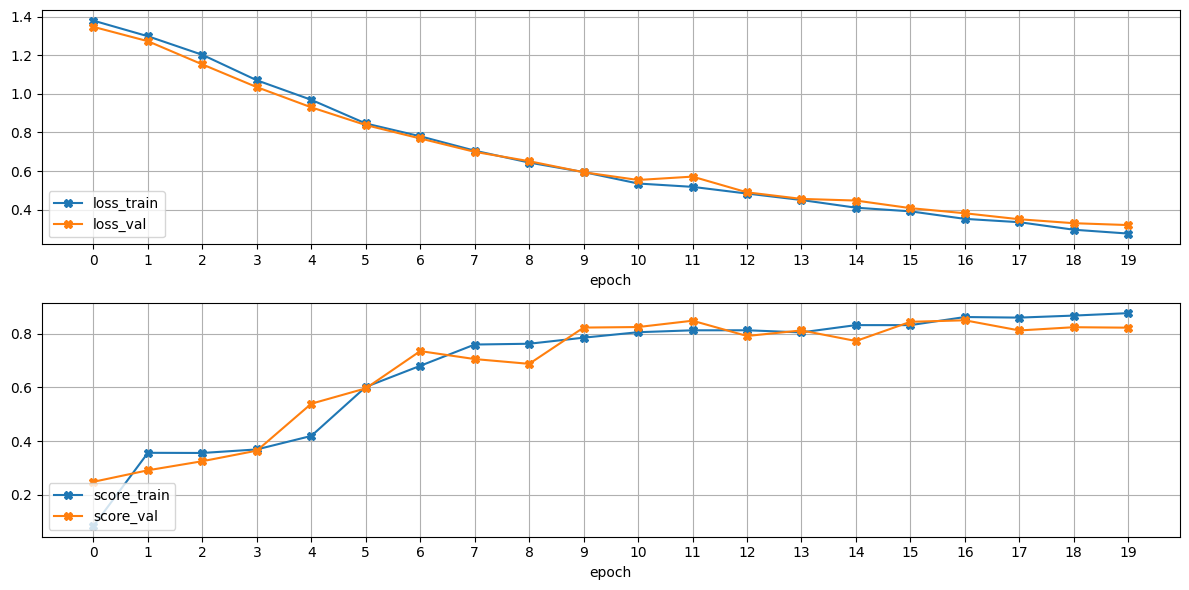

In [46]:
set_random_seed(42)

model = Network().to(device)

criterion =  nn.CrossEntropyLoss(weight = weights_for_classes)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

pp = train(model, train_loader, test_loader, criterion, optimizer, score_function, device, num_epochs=20)

–û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é –æ—Ç—á–µ—Ç–∞ –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫.

              precision    recall  f1-score   support

       unacc       0.99      0.92      0.96       242
         acc       0.77      0.83      0.80        77
        good       0.67      0.86      0.75        14
       vgood       0.65      1.00      0.79        13

    accuracy                           0.90       346
   macro avg       0.77      0.90      0.82       346
weighted avg       0.92      0.90      0.91       346



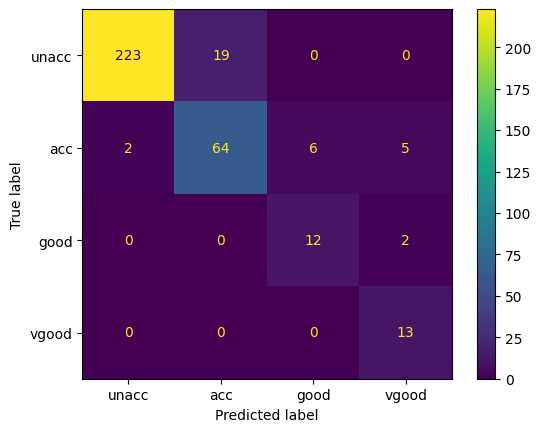

In [48]:
y_test_true, y_test_pred = get_true_and_pred(test_loader, model)

print(
    classification_report(
        y_test_true, y_test_pred, target_names=classes, zero_division=0
    )
)

cm = confusion_matrix(y_test_true, y_test_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot()
plt.show()

–û–ø–∏—à–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–¢–µ–ø–µ—Ä—å, –∫–æ–≥–¥–∞ –º—ã –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –≤–∑—è–ª–∏ –≤–∑–≤–µ—à–µ–Ω–Ω—ã–π logloss, —Ç–æ —É –Ω–∞—Å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –∑–∞–º–µ—Ç–Ω–æ —É–ª—É—á—à–∏–ª–æ—Å—å –¥–ª—è –∫–ª–∞—Å—Å–æ–≤, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ—Ç–æ—Ä—ã—Ö –∑–∞–º–µ—Ç–Ω–æ –º–µ–Ω—å—à–µ.
–£–ª—É—á—à–∏–ª–æ—Å—å –æ–Ω–æ –∑–∞ —Å—á–µ—Ç –≤–µ—Å–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –ø—Ä–∏—Å–≤–æ–∏–ª–∏ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É, –≥–¥–µ —á–µ–º –º–µ–Ω—å—à–µ –æ–±—ä–µ–∫—Ç–æ–≤–∞ –∫–ª–∞—Å—Å–∞ i –≤ –≤—ã–±–æ—Ä–∫–µ, —Ç–µ–º –±–æ–ª—å—à–µ –µ–≥–æ –≤—Å–µ (–≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã –≤–∑—è–ª–∏ –≤–µ—Å 1 / –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–ª–∞—Å—Åa i)

## Focal Loss

–í–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å Focal Loss –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –ø–æ–¥–æ–±–Ω–æ —Ç–æ–º—É, –∫–∞–∫ –≤—ã —Å–¥–µ–ª–∞–ª–∏ –≤ –±–µ–π–∑–ª–∞–π–Ω–µ —Å –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏–µ–π.

–í —ç—Ç–æ–º –ø—É–Ω–∫—Ç–µ **–Ω–µ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ** –≤–µ—Å–∞ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤. –ü–∞—Ä–∞–º–µ—Ç—Ä $\gamma$ –ø—Ä–∏–º–∏—Ç–µ —Ä–∞–≤–Ω—ã–º $2$.

In [49]:
#!wget -qN https://raw.githubusercontent.com/AdeelH/pytorch-multi-class-focal-loss/master/focal_loss.py
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/Exercises/EX05/focal_loss.py

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–∑ [–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏](https://github.com/AdeelH/pytorch-multi-class-focal-loss/blob/master/focal_loss.py):

* `alpha` (*Tensor*, optional): Weights for each class. Defaults to `None`.
* `gamma` (*float*, optional): A constant, as described in the paper. Defaults to `0`.
* `reduction` (*str*, optional): `'mean'`, `'sum'` or `'none'`. Defaults to `'mean'`.
* `ignore_index` (*int*, optional): class label to ignore. Defaults to `-100`.

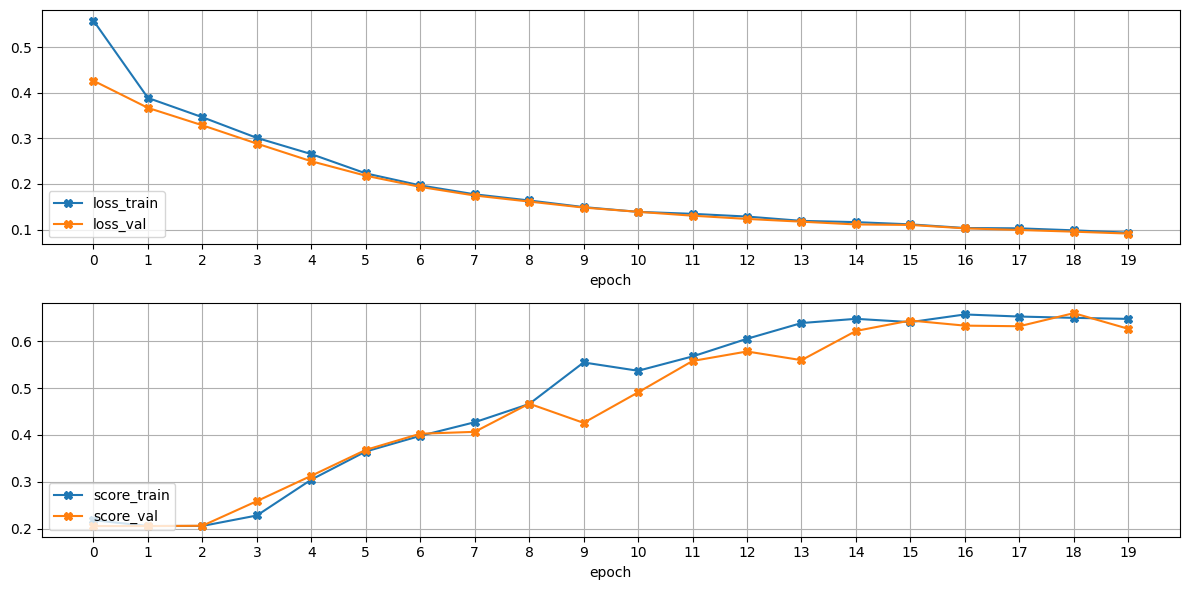

In [58]:
from focal_loss import FocalLoss

set_random_seed(42)

model = Network().to(device)

criterion = FocalLoss(gamma=2)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

pp = train(model, train_loader, test_loader, criterion, optimizer, score_function, device, num_epochs=20)

–û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

              precision    recall  f1-score   support

       unacc       0.97      0.98      0.97       242
         acc       0.76      0.88      0.81        77
        good       0.00      0.00      0.00        14
       vgood       0.75      0.69      0.72        13

    accuracy                           0.90       346
   macro avg       0.62      0.64      0.63       346
weighted avg       0.87      0.90      0.89       346



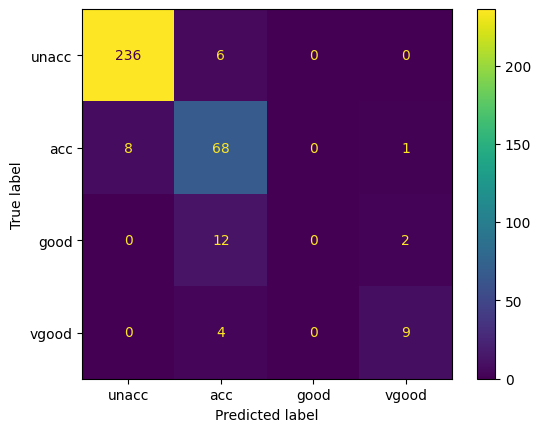

In [59]:
y_test_true, y_test_pred = get_true_and_pred(test_loader, model)

print(
    classification_report(
        y_test_true, y_test_pred, target_names=classes, zero_division=0
    )
)

cm = confusion_matrix(y_test_true, y_test_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot()
plt.show()

–û–ø–∏—à–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–ú—ã —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º –¥–≤–µ –º–æ–¥–µ–ª–∏ —Å –Ω–µ–≤–∑–≤–µ—à–µ–Ω–Ω—ã–º–∏ logloss –∏ focal loss (gamma = 2), —Ç. –µ. 
LogLoss = sum(-log(p_i))
FocalLoss = sum(-alpha(1 - p_i)^2 * log(p_i))
–ù—É –∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –Ω–µ–≤–∑–≤–µ—à–µ–Ω–Ω–æ–π logloss, focal loss –∏–º–µ–µ—Ç —Ç–µ –∂–µ –ø—Ä–æ–±–ª–µ–º—ã —Å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏ good –∏ vgood, –Ω–æ –≤—Å–µ-—Ç–∞–∫–∏ –ø–æ macro avg –æ–Ω–∞ –≤—ã–∏–≥—Ä—ã–≤–∞–µ—Ç
MacroAvg = —Å—Ä–µ–¥–Ω–µ–µ –≤—Å–µ—Ö Precision –∏ Recall

## Focal Loss —Å –≤–µ—Å–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤

–û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å —Å Focal Loss, –ø–µ—Ä–µ–¥–∞–≤ –µ–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø–∞—Ä–∞–º–µ—Ç–∞ `alpha` —Ç–µ–Ω–∑–æ—Ä –≤–µ—Å–æ–≤ `weights_for_classes`. –ö–∞–∫ –∏ –≤ –ø—Ä–æ—à–ª–æ–º –ø—É–Ω–∫—Ç–µ, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ $\gamma=2$.

In [87]:
weights_for_classes *= 10

In [88]:
weights_for_classes

tensor([ 0.8264,  2.6042, 14.4928, 15.3846])

–ü—Ä–∏—à–ª–æ—Å—å —É–º–Ω–æ–∂–∞—Ç—å –≤–µ—Å–∞ –Ω–∞ 1000

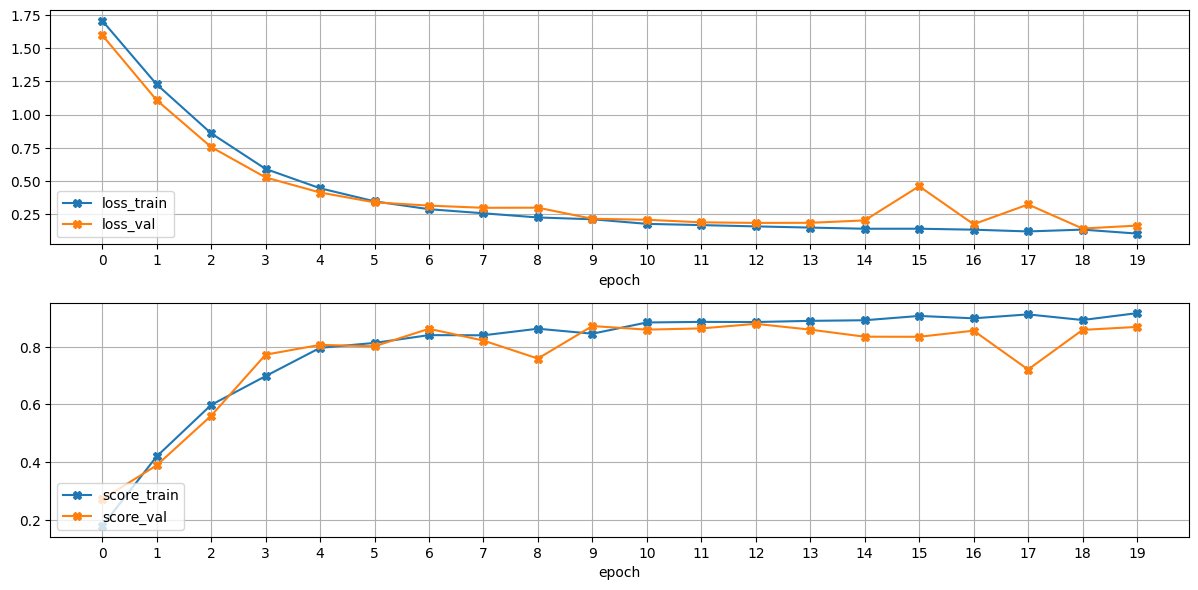

In [89]:
set_random_seed(42)

model = Network().to(device)

criterion = FocalLoss(alpha=weights_for_classes, gamma=2)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

pp = train(model, train_loader, test_loader, criterion, optimizer, score_function, device, num_epochs=20)

–û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

              precision    recall  f1-score   support

       unacc       0.99      0.95      0.97       242
         acc       0.85      0.88      0.87        77
        good       0.75      0.86      0.80        14
       vgood       0.72      1.00      0.84        13

    accuracy                           0.93       346
   macro avg       0.83      0.92      0.87       346
weighted avg       0.94      0.93      0.94       346



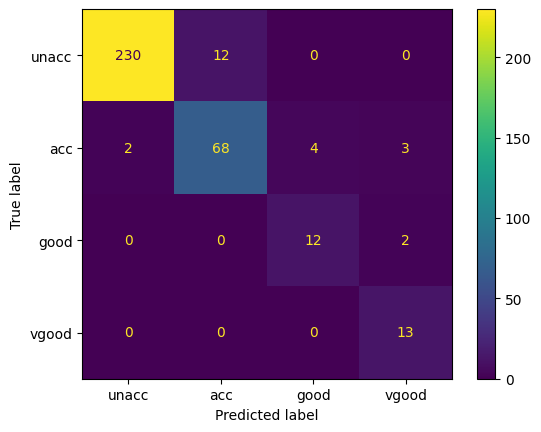

In [90]:
y_test_true, y_test_pred = get_true_and_pred(test_loader, model)

print(
    classification_report(
        y_test_true, y_test_pred, target_names=classes, zero_division=0
    )
)

cm = confusion_matrix(y_test_true, y_test_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot()
plt.show()

–û–ø–∏—à–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–ú–Ω–µ –ø—Ä–∏—à–ª–æ—Å—å —É–º–Ω–æ–∂–∞—Ç—å –≤–µ—Å–∞ –Ω–∞ 1000, —á—Ç–æ–±—ã focal loss –∞–¥–µ–∫–≤–∞—Ç–Ω–æ —Ä–∞–±–æ—Ç–∞–ª,

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ —Å—Ç–∞–ª–æ –ª—É—á—à–∏–º, –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏ –º–æ–¥–µ–ª—è–º–∏, –∫–∞–∫ –º–∏–Ω–∏–º—É–º, macro Precision, Recall –∏ F1 –∑–∞–º–µ—Ç–Ω–æ —É–ª—É—á—à–∏–ª–∏—Å—å

–ù–æ —Å—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É, –µ—Å—Ç—å –º–∞–ª–µ–Ω—å–∫–∏–π —Ä–∏—Å–∫ - —á—Ç–æ –º–æ–¥–µ–ª—å –º–æ–≥–ª–∞ –ø–µ—Ä–µ–æ–±—É—á–∏—Ç—å—Å—è

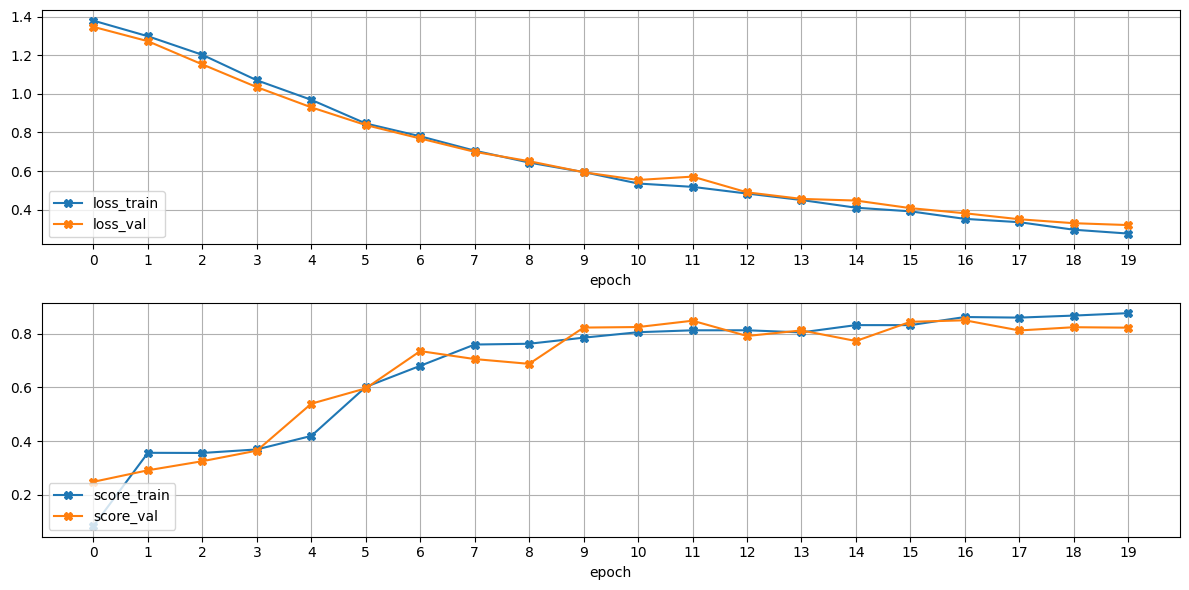

In [91]:
set_random_seed(42)

model = Network().to(device)

criterion =  nn.CrossEntropyLoss(weight = weights_for_classes)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

pp = train(model, train_loader, test_loader, criterion, optimizer, score_function, device, num_epochs=20)

## Weighted Random Sampler + Cross-Entropy Loss

–ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å—ã —Å –ø–æ–º–æ—â—å—é –≤–µ—Å–æ–≤ –º–æ–∂–Ω–æ –Ω–µ —Ç–æ–ª—å–∫–æ —É–∫–∞–∑—ã–≤–∞—è –∏—Ö –≤ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, –Ω–æ —Ç–∞–∫–∂–µ –∏ –ø—Ä–∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–∏ –±–∞—Ç—á–µ–π.

Weighted Random Sampler –∑–∞–Ω–∏–º–∞–µ—Ç—Å—è —Ç–µ–º, —á—Ç–æ –ø—Ä–∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–∏ –±–∞—Ç—á–µ–π —É—á–∏—Ç—ã–≤–∞–µ—Ç –≤–µ—Å–∞ —Ä–∞–∑–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤. –¢–µ–º —Å–∞–º—ã–º –º—ã –ø–æ–ª—É—á–∞–µ–º –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –º–æ–¥–µ–ª–∏ –æ–±—ä–µ–∫—Ç—ã –º–∏–Ω–æ—Ä–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ —á–∞—â–µ.

–û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã —Å Weighted Random Sampler –≤ —Ç–æ–º, —á—Ç–æ –µ–º—É –Ω—É–∂–Ω–æ –ø–µ—Ä–µ–¥–∞—Ç—å **–≤–µ—Å–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞** –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —Ç–µ–º, –∫ –∫–∞–∫–æ–º—É –∫–ª–∞—Å—Å—É —ç—Ç–æ—Ç –æ–±—ä–µ–∫—Ç –æ—Ç–Ω–æ—Å–∏—Ç—Å—è. –°–æ–∑–¥–∞–π—Ç–µ —Ç–∞–∫–æ–π —Ç–µ–Ω–∑–æ—Ä –≤–µ—Å–æ–≤ `weight_for_every_sample`.

In [102]:
# Your code here

weights_for_classes = torch.tensor(1 / data["class"].value_counts()).float().to(device)

weight_for_every_sample = weights_for_classes[y_train]

weight_for_every_sample

tensor([0.0026, 0.0008, 0.0008,  ..., 0.0026, 0.0008, 0.0026])

–¢–µ–ø–µ—Ä—å –Ω—É–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å `sampler`.

`WeightedRandomSampler`-—É –ø—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –Ω—É–∂–Ω–æ –ø–µ—Ä–µ–¥–∞—Ç—å –º–∞—Å—Å–∏–≤ –≤–µ—Å–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞, –∞ —Ç–∞–∫–∂–µ –ø–∞—Ä–∞–º–µ—Ç—Ä `num_samples` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –¥–ª—è –≤—ã–¥–∞—á–∏ –∑–∞ –æ–¥–Ω—É —ç–ø–æ—Ö—É. –≠—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –º–æ–∂–Ω–æ –ø—Ä–∏–Ω—è—Ç—å —Ä–∞–≤–Ω—ã–º –¥–ª–∏–Ω–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏.

–î–∞–ª–µ–µ –Ω—É–∂–Ω–æ –∑–∞–Ω–æ–≤–æ —Å–æ–∑–¥–∞—Ç—å –æ–±—É—á–∞—é—â–∏–π `DataLoader`, –∏ –ø–µ—Ä–µ–¥–∞—Ç—å –µ–º—É –≤–∑–≤–µ—à–µ–Ω–Ω—ã–π `sampler`.

In [103]:
sampler = WeightedRandomSampler(weight_for_every_sample, len(weight_for_every_sample), replacement=True)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, sampler=sampler)

–û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å —Å Cross-Entropy Loss **–±–µ–∑ –≤–µ—Å–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤**, –∏—Å–ø–æ–ª—å–∑—É—è —Å–æ–∑–¥–∞–Ω–Ω—ã–π –≤—ã—à–µ `DataLoader` —Å–æ –≤–∑–≤–µ—à–µ–Ω–Ω—ã–º —Å—ç–º–ø–ª–µ—Ä–æ–º. –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –º—ã —É–∂–µ —É—á–ª–∏ –¥–∏—Å–±–∞–ª–∞–Ω—Å –≤–æ –≤–∑–≤–µ—à–µ–Ω–Ω–æ–º —Å—ç–º–ø–ª–µ—Ä–µ, –ø–æ—ç—Ç–æ–º—É —É–∫–∞–∑—ã–≤–∞—Ç—å –≤–µ—Å–∞ –≤ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–µ –Ω—É–∂–Ω–æ.

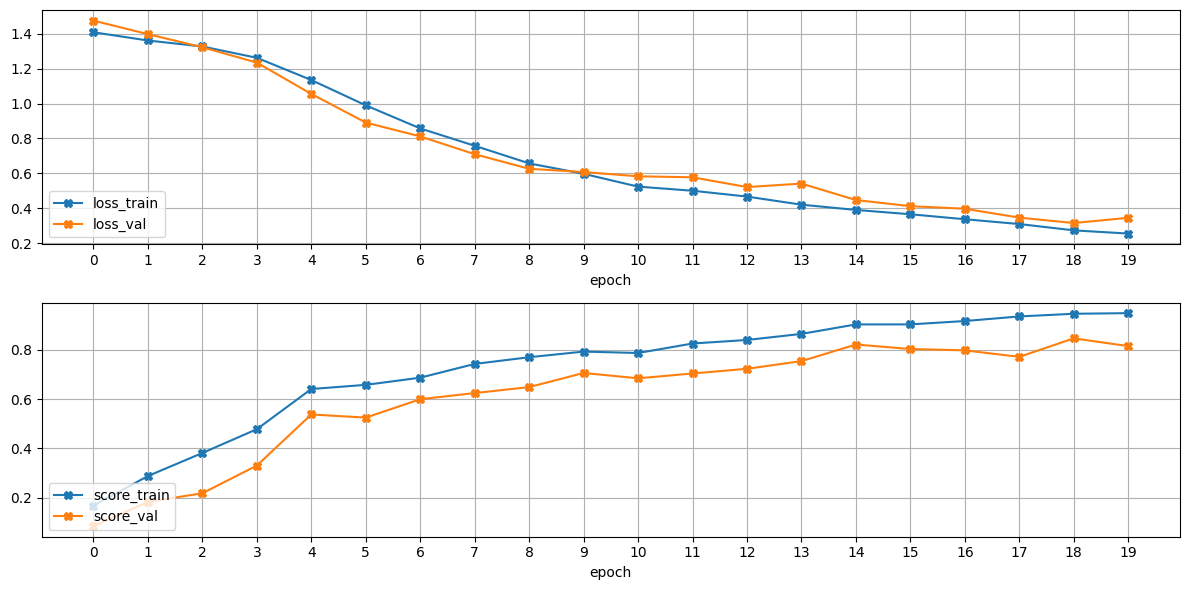

In [104]:
model = Network().to(device)

criterion =  nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

pp = train(model, train_loader, test_loader, criterion, optimizer, score_function, device, num_epochs=20)

–û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

              precision    recall  f1-score   support

       unacc       1.00      0.81      0.89       242
         acc       0.60      0.91      0.73        77
        good       0.75      0.86      0.80        14
       vgood       0.72      1.00      0.84        13

    accuracy                           0.84       346
   macro avg       0.77      0.89      0.81       346
weighted avg       0.89      0.84      0.85       346



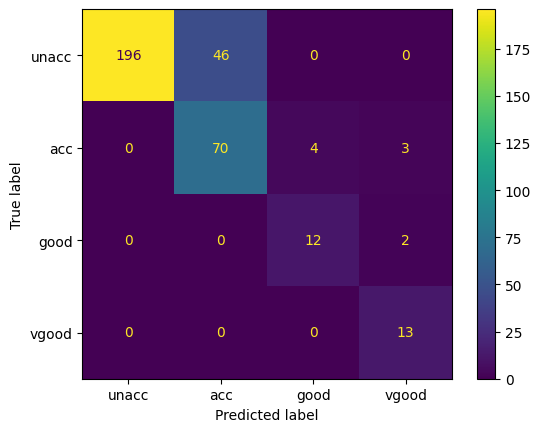

In [105]:
y_test_true, y_test_pred = get_true_and_pred(test_loader, model)

print(
    classification_report(
        y_test_true, y_test_pred, target_names=classes, zero_division=0
    )
)

cm = confusion_matrix(y_test_true, y_test_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot()
plt.show()

–û–ø–∏—à–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–û—Ç–ª–∏—á–∏—è –æ—Ç –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–µ–π –≤ —Å–ª–µ–¥—É—é—â–µ–º:
1. –í —Ü–µ–ª–æ–º —Ö–æ—Ä–æ—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –º–µ—Ç—Ä–∏–∫–∏
2. –ó–∞–º–µ—Ç–Ω–æ, —á—Ç–æ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤ unacc –∏ acc —É –Ω–∞—Å –º–æ–¥–µ–ª—å –¥–æ–≤–æ–ª—å–Ω–æ –º–Ω–æ–≥–æ –æ—à–∏–±–∞–µ—Ç—Å—è –∏ –º–Ω–æ–≥–∏–µ –∏–∑ acc –æ–Ω –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª –∫–∞–∫ unacc

## Weighted Random Sampler + Focal Loss

–ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –æ–±—É—á–µ–Ω–∏–µ —Å Focal Loss, –∏—Å–ø–æ–ª—å–∑—É—è —É–∂–µ —Å–æ–∑–¥–∞–Ω–Ω—ã–π `DataLoader` —Å–æ –≤–∑–≤–µ—à–µ–Ω–Ω—ã–º —Å—ç–º–ø–ª–µ—Ä–æ–º.

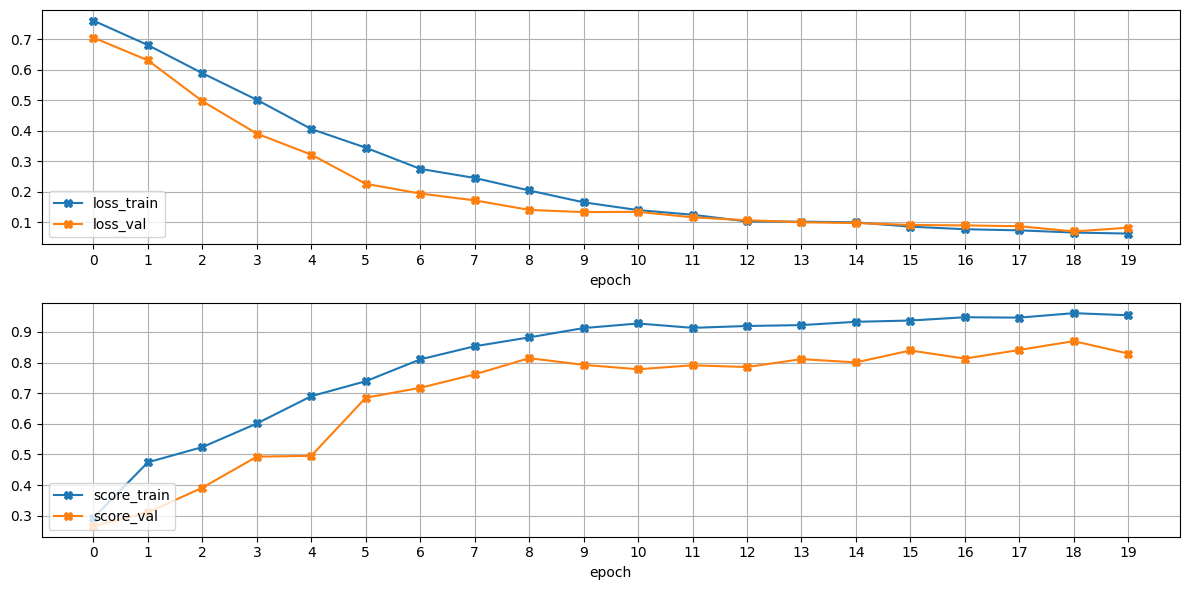

In [106]:
model = Network().to(device)

criterion = FocalLoss(gamma=2)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

pp = train(model, train_loader, test_loader, criterion, optimizer, score_function, device, num_epochs=20)

–û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

              precision    recall  f1-score   support

       unacc       0.99      0.92      0.95       242
         acc       0.76      0.84      0.80        77
        good       0.67      0.86      0.75        14
       vgood       0.68      1.00      0.81        13

    accuracy                           0.90       346
   macro avg       0.78      0.90      0.83       346
weighted avg       0.92      0.90      0.91       346



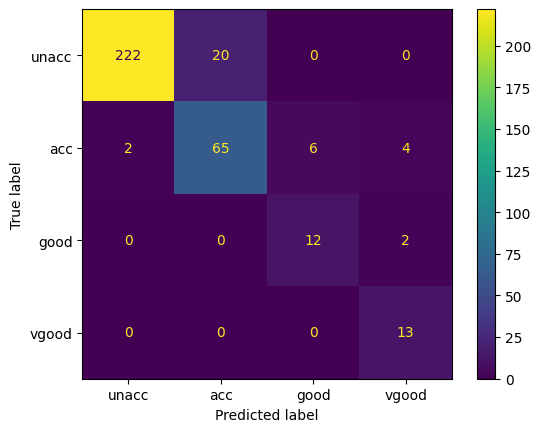

In [107]:
y_test_true, y_test_pred = get_true_and_pred(test_loader, model)

print(
    classification_report(
        y_test_true, y_test_pred, target_names=classes, zero_division=0
    )
)

cm = confusion_matrix(y_test_true, y_test_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot()
plt.show()

–û–ø–∏—à–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–ó–¥–µ—Å—å —É–∂–µ –æ—à–∏–±–æ–∫ –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ acc –ø–æ–º–µ–Ω—å—à–µ, —á–µ–º –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º –ø—Ä–∏–º–µ—Ä–µ —Å Weighted Random Sampler + –∫—Ä–æ—Å—Å —ç–Ω—Ç—Ä–æ–ø–∏–∏
–ò –≤ —Ü–µ–ª–æ–º, —ç—Ç–∞ –º–æ–¥–µ–ª—å —è–≤–ª—è–µ—Ç—Å—è —Ö–æ—Ä–æ—à–µ–π, –Ω–æ –Ω–µ –ª—É—á—à–µ–π

## –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

–°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π —Å —Ä–∞–∑–Ω—ã–º–∏ —Ç–µ—Ö–Ω–∏–∫–∞–º–∏ –±–æ—Ä—å–±—ã —Å –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–º. –í –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ä—ã —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å *macro F-1 score*, –∫–æ—Ç–æ—Ä—ã–π –≤—ã–≤–æ–¥–∏—Ç—Å—è –≤ `classification_report`.

## –§–æ—Ä–º–∞—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

–†–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞–¥–∞–Ω–∏—è —è–≤–ª—è–µ—Ç—Å—è –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å —à–µ—Å—Ç—å—é —Ç–µ—Ö–Ω–∏–∫–∞–º–∏:
0. –ë–µ–π–∑–ª–∞–π–Ω —Å –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏–µ–π
1. –ö—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è —Å –≤–µ—Å–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤
2. Focal Loss
3. Focal Loss —Å –≤–µ—Å–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤
4. Weighted Random Sampler + –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è
5. Weighted Random Sampler + Focal Loss

–î–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è —Ç—Ä–µ–±—É–µ—Ç—Å—è –≤—ã–≤–µ—Å—Ç–∏ –æ—Ç—á–µ—Ç –æ –∫–∞—á–µ—Å—Ç–≤–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –∏ –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫.
–í –∫–æ–Ω—Ü–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è —Å—Ä–∞–≤–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ *macro F-1 score*.

macro avg       0.60      0.57      0.57
macro avg       0.77      0.90      0.82
macro avg       0.62      0.64      0.63
macro avg       0.83      0.92      0.87 
macro avg       0.77      0.89      0.81
macro avg       0.78      0.90      0.83

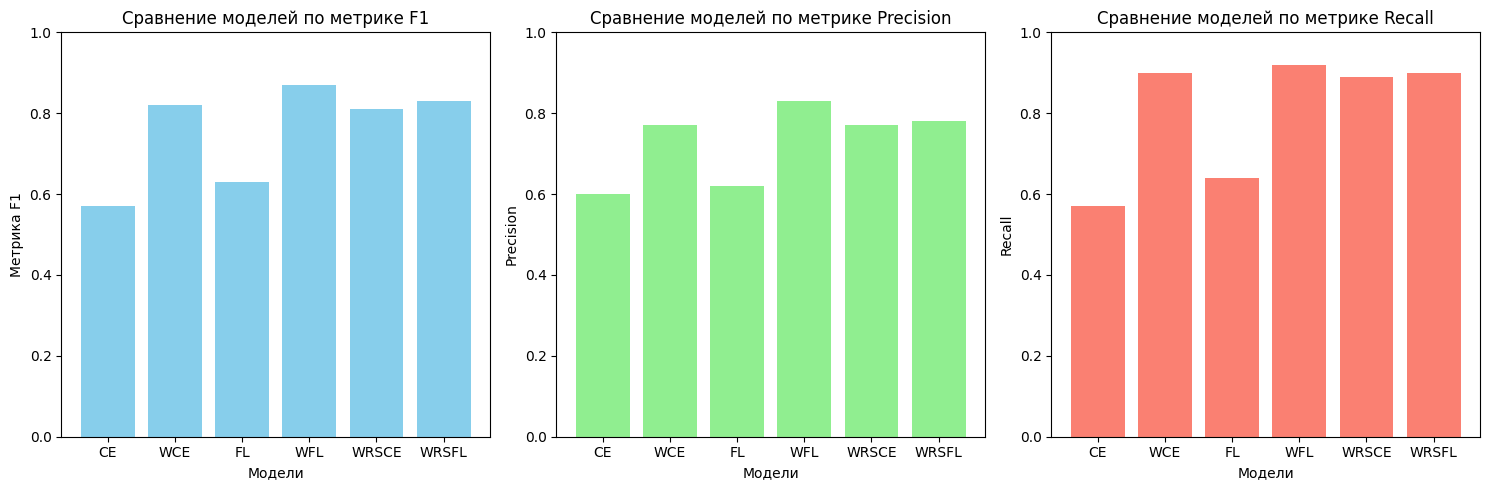

In [132]:
CE = [0.60, 0.57, 0.57]
WCE = [0.77, 0.90, 0.82]
FL = [0.62, 0.64, 0.63]
WFL = [0.83, 0.92, 0.87]
WRSCE = [0.77, 0.89, 0.81]
WRSFL = [0.78, 0.90, 0.83]

models = [CE, WCE, FL, WFL, WRSCE, WRSFL]

precision_macro_avg = [model[0] for model in models]
recall_macro_avg = [model[1] for model in models]
F1_macro_avg = [model[2] for model in models]

models = ['CE', 'WCE', 'FL', 'WFL', 'WRSCE', 'WRSFL']
plt.figure(figsize=(15,5))

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è F1-Score
plt.subplot(1, 3, 1)
plt.bar(models, F1_macro_avg, color='skyblue')
plt.xlabel('–ú–æ–¥–µ–ª–∏')
plt.ylabel('–ú–µ—Ç—Ä–∏–∫–∞ F1')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–µ F1')
plt.ylim(0, 1)

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è Precision
plt.subplot(1, 3, 2)
plt.bar(models, precision_macro_avg, color='lightgreen')
plt.xlabel('–ú–æ–¥–µ–ª–∏')
plt.ylabel('Precision')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–µ Precision')
plt.ylim(0, 1)

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è Recall
plt.subplot(1, 3, 3)
plt.bar(models, recall_macro_avg, color='salmon')
plt.xlabel('–ú–æ–¥–µ–ª–∏')
plt.ylabel('Recall')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–µ Recall')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()